In [ ]:
# ----------------------------------------
# 🧠 AI Data Analyst Chatbot using Groq API
# ----------------------------------------
# This script sends a user's natural language question to the Groq LLM,
# receives Python pandas code in return, auto-executes it, and displays results.

Generated and corrected Python code:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('house_data.csv')

# Exploratory Data Analysis
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

# Convert 'date' to datetime and extract year
df['date'] = pd.to_datetime(df['date'])
df['year_sold'] = df['date'].dt.year

# Drop the 'date' column
df = df.drop('date', axis=1)

# Handle missing values (example)
df['yr_renovated'] = df['yr_renovated'].fillna(0)

# Correlation matrix
corr_matrix = df.corr()
print(corr_matrix['price'].sort_values(ascending=False))

# Visualization
plt.figure(figsize=(10,6))
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title('Price vs Living Area')
plt.show()

# Boxp

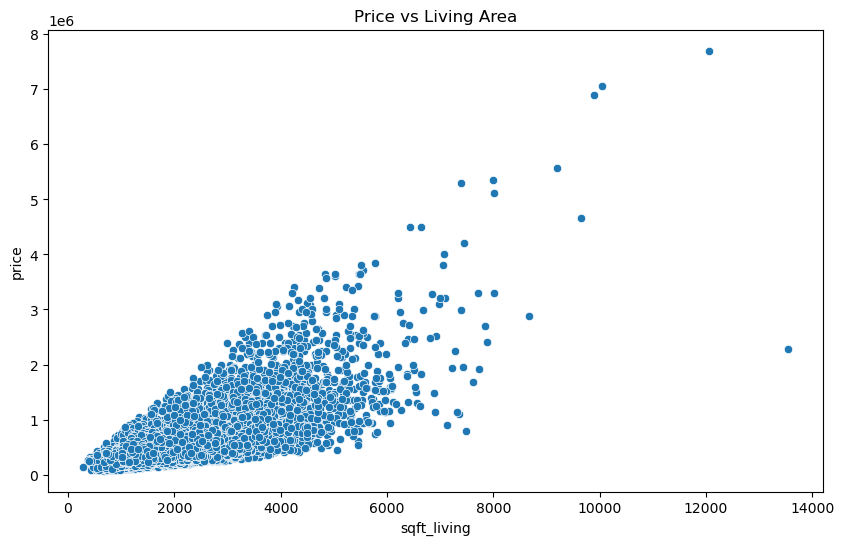

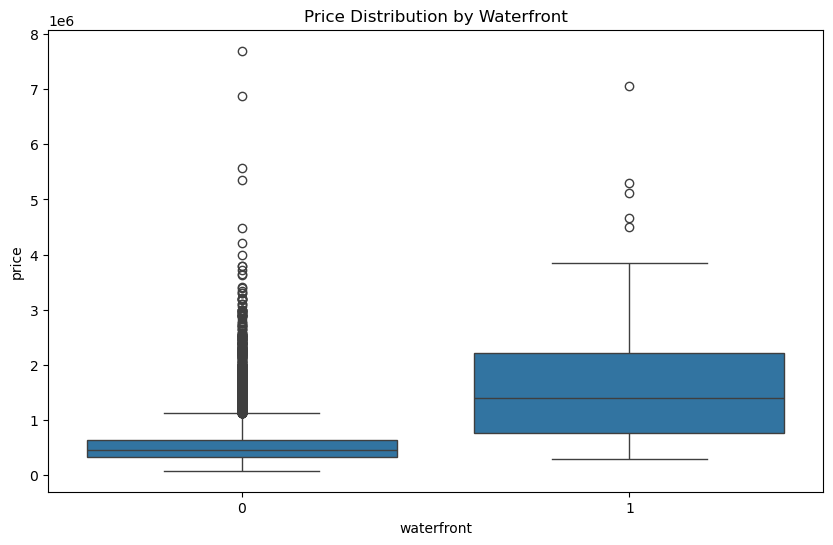

Mean Squared Error: 61515972728.9223
R-squared Score: 0.5930856557827262


<string>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


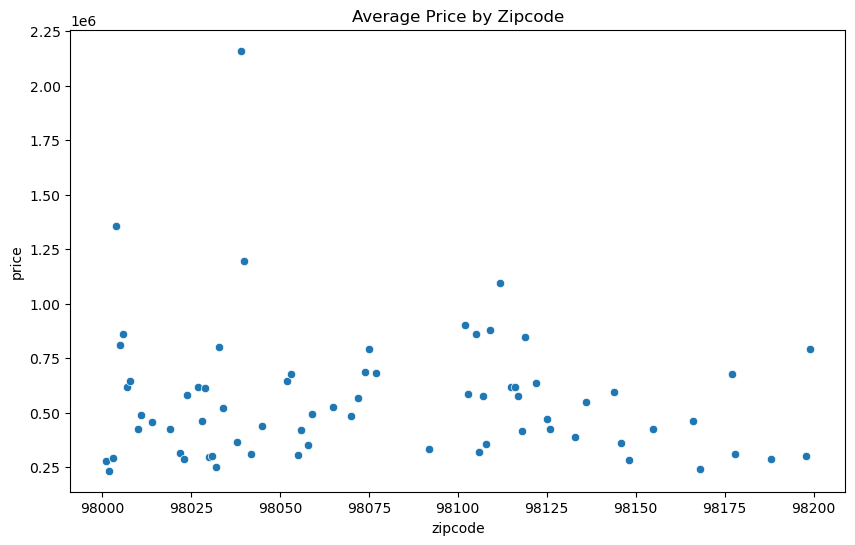

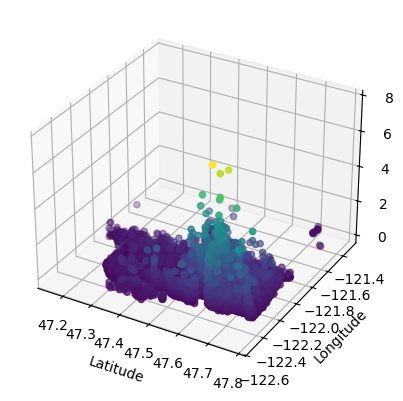

In [12]:
# 1. Imports and API Client Setup
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from openai import OpenAI
import seaborn as sns


# Set your Groq API key directly (replace with your real key)
api_key = "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"  # <--- Replace with your actual key

client = OpenAI(
    base_url="https://api.groq.com/openai/v1",
    api_key=api_key,
)

# 2. Helper Functions

def generate_code_from_prompt(dataset_desc, analysis_request):
    prompt = f"""
    Dataset Description:
    {dataset_desc}

    Please provide Python pandas code to {analysis_request}.
    Only provide the code, no explanations.
    """
    response = client.chat.completions.create(
        model="deepseek-r1-distill-llama-70b",
        messages=[{"role": "user", "content": prompt}],
    )
    return response.choices[0].message.content

def replace_csv_filename(code, actual_filename='house_data.csv'):
    """
    Replace any CSV filename in the generated code with the actual filename.
    """
    pattern = r"pd\.read_csv\(['\"]([^'\"]+\.csv)['\"]\)"
    updated_code = re.sub(pattern, f"pd.read_csv('{actual_filename}')", code)
    return updated_code

import re

def extract_code_from_markdown(text):
    """
    Extracts Python code from markdown code blocks like ```python ... ``` or ```...```.
    If no code block is found, returns the original text.
    """
    # Look for triple backtick blocks with or without "python"
    match = re.search(r"```(?:python)?\s*(.*?)```", text, re.DOTALL)
    if match:
        return match.group(1).strip()
    return text.strip()

# 3. Main Function

def run_analysis_prompt(dataset_description, analysis_prompt, dataset_filename='house_data.csv'):
    # Step 1: Generate code from the model
    code = generate_code_from_prompt(dataset_description, analysis_prompt)
    
    # Step 2: Replace any generic filename with the correct one
    corrected_code = replace_csv_filename(code, dataset_filename)
    
    # Step 3: Extract raw Python code (strip markdown)
    python_code = extract_code_from_markdown(corrected_code)
    
    print("Generated and corrected Python code:\n")
    print(python_code)
    print("\n--- Executing code below ---\n")
    
    # Step 4: Run the cleaned code
    try:
        exec(python_code, globals())
    except Exception as e:
        print("❌ Error during execution:", e)

# 4. Example Usage

dataset_description = """
HRDataset with 311 rows and 36 columns including:
- id, date, price, bedrooms, bathrooms, sqft_living,
     sqft_lot, floors, waterfront, view, condition, grade,
     sqft_above, sqft_basement, yr_built, yr_renovated,
     zipcode, lat, long, sqft_living15, sqft_lot15
"""

analysis_prompt = "what type of analysis do u think is best suited and do that analysis and tell what u find "


run_analysis_prompt(dataset_description, analysis_prompt)


Generated and corrected Python code:

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('hotel_bookings.csv')

# Select numerical columns
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))

# Plot boxplots for each numerical column
for i, column in enumerate(numerical_df.columns):
    ax = axes[i // 5, i % 5]
    numerical_df.boxplot(column=column, ax=ax)
    ax.set_title(column)
    ax.set_xlabel('')
    ax.set_ylabel('Value')

# Adjust layout and display plot
plt.tight_layout()
plt.show()

--- Executing code below ---

❌ Error during execution: index 2 is out of bounds for axis 0 with size 2


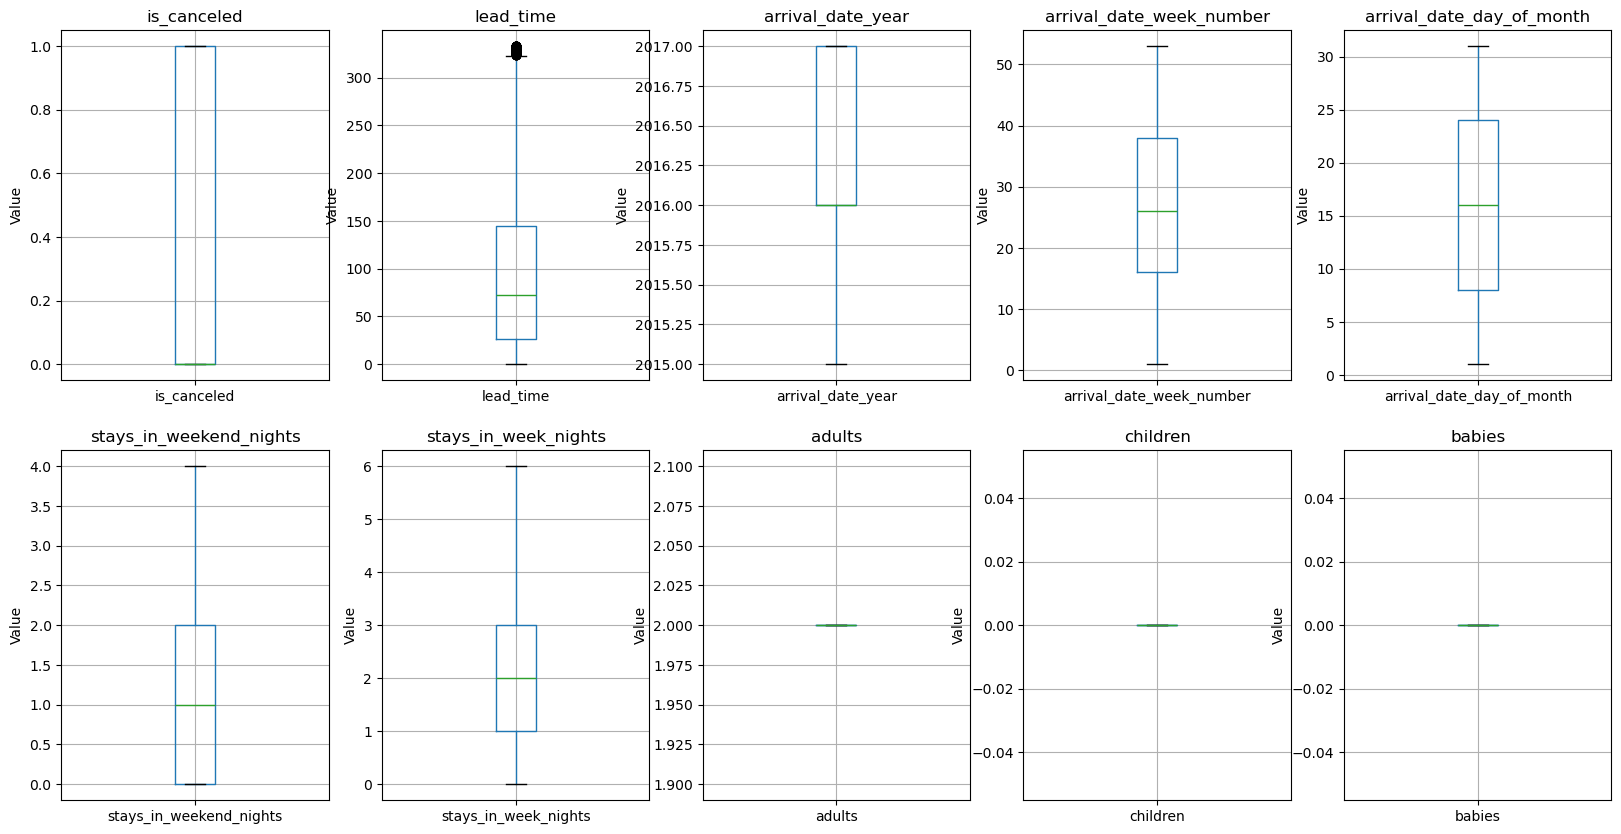

In [22]:

analysis_prompt = "plot boxplot for numerical columns "


run_analysis_prompt(dataset_description, analysis_prompt)